In [5]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Task Overview

Your task is to create, train, and evaluate a regression model based on an artificial neural network to predict the age of abalones (a family of marine mollusks, also known as ear shells).  
The model should use a properly prepared dataset containing information about these mollusks.

## Task 1 – Loading and Initial Data Preparation


In [6]:

# 1. Load the abalone.csv file into a DataFrame named df
df = pd.read_csv("abalone.csv")

# 2. Display information about the dataset and summary statistics for numerical variables
print("Dataset information:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

# 3. Check if there are any missing values in the dataset (possibly encoded differently than np.nan)
# Check for NaN
print("\nNumber of missing values (NaN):")
print(df.isnull().sum())

# Check for other suspicious values like empty strings ''
print("\nUnique values in each column (to detect any missing values encoded differently):")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

# Remove rows containing empty strings (if any)
df = df[~(df == '').any(axis=1)]

# 4. Display unique values in the “Sex” column and their frequencies
print("\nUnique values in the 'Sex' column:")
print(df['Sex'].value_counts())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

Descriptive statistics:
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      

## Task 2 – Data Visualization

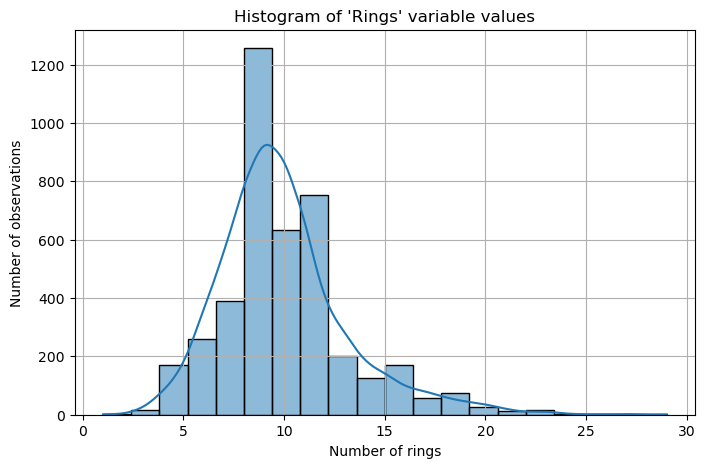

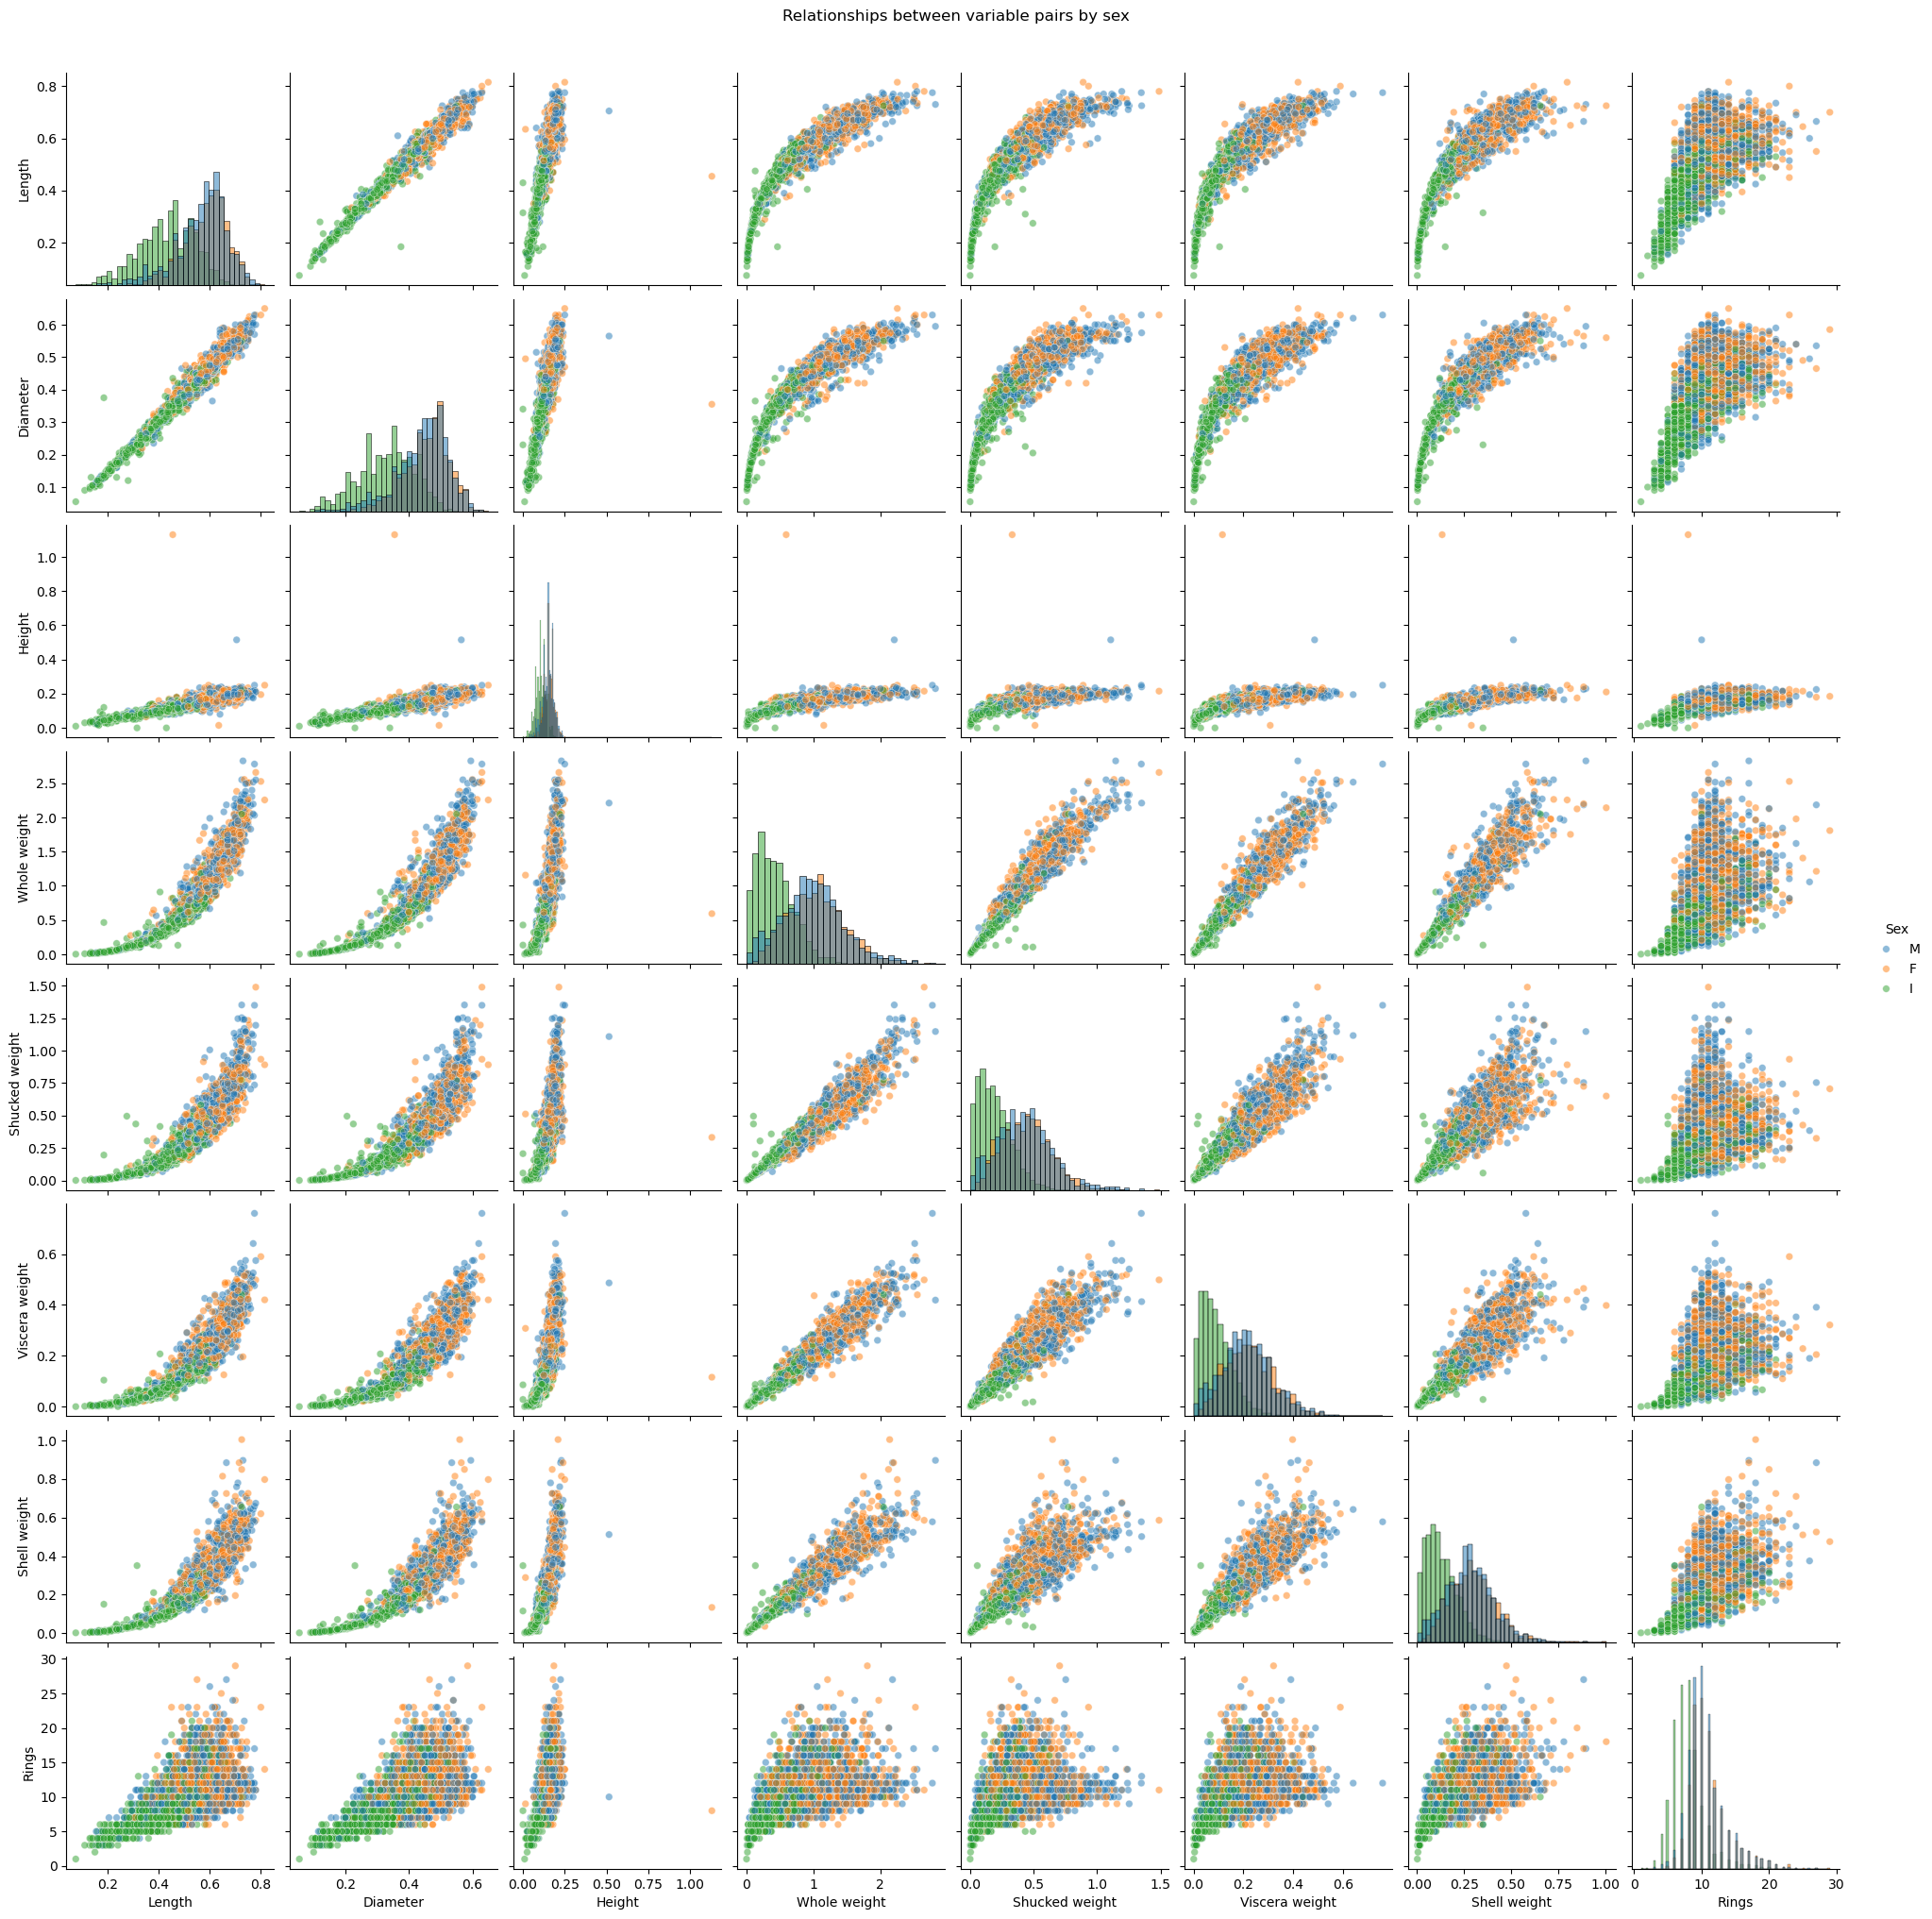

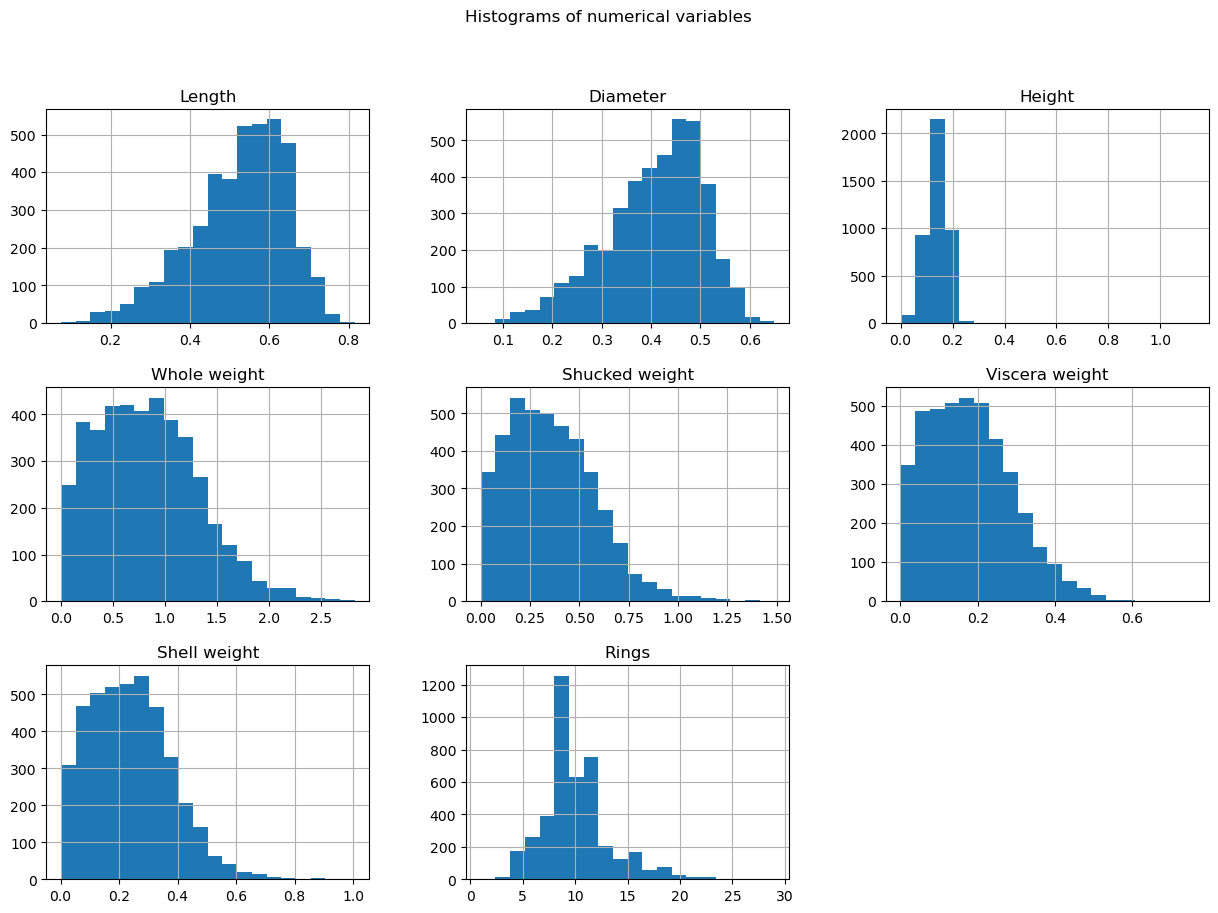

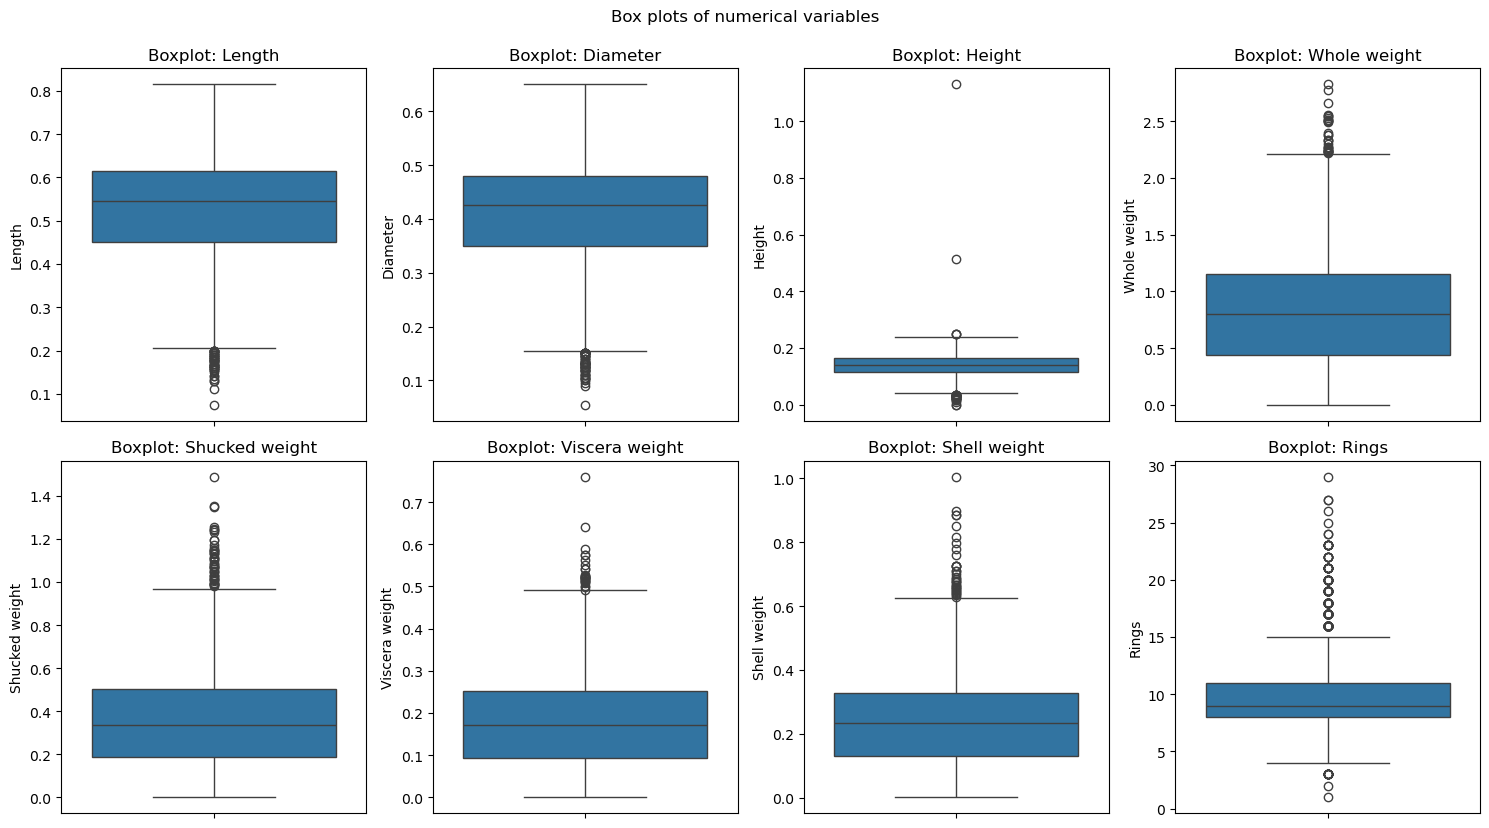

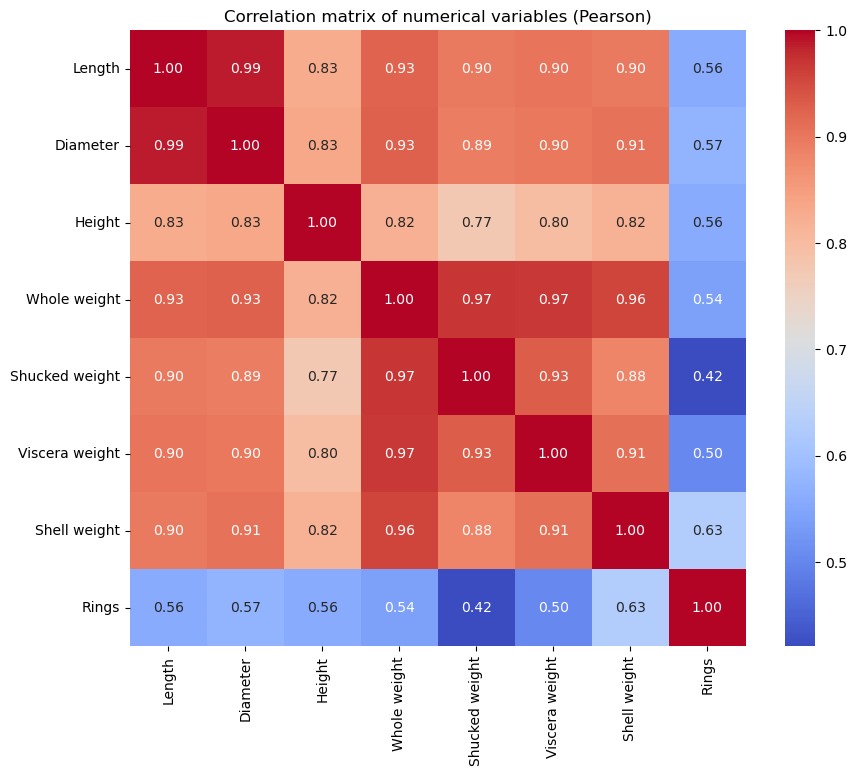

In [7]:
# 1. Create a histogram showing the distribution of the "Rings" variable
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Rings", bins=20, kde=True)
plt.title("Histogram of 'Rings' variable values")
plt.xlabel("Number of rings")
plt.ylabel("Number of observations")
plt.grid(True)
plt.show()

# 2. Scatter plots between variable pairs with color indicating sex
sns.pairplot(df, hue="Sex", diag_kind="hist", plot_kws={'alpha': 0.5, 's': 30})
plt.suptitle("Relationships between variable pairs by sex", y=1.02)
plt.show()

# 3. Histograms and box plots for numerical variables
# List of numerical columns (excluding 'Sex')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Histograms
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of numerical variables")
plt.show()

# Box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.suptitle("Box plots of numerical variables", y=1.03)
plt.show()

# 4. Correlation matrix of numerical variables as a heatmap
corr_matrix = df[numeric_cols].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation matrix of numerical variables (Pearson)")
plt.show()


## Task 3 – Data Preparation

In [8]:
# 1. Split into input features (X) and target variable (y)
X = df.drop("Rings", axis=1).copy()
y = df["Rings"].copy()

# 2. Encode the 'Sex' variable using one-hot encoding and remove the original version
X = pd.get_dummies(X, columns=["Sex"], dtype=float)

# 3. Split the data while preserving the gender distribution
stratify_col = df["Sex"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_col
)

# 4. Check the shapes and data types
print("Shapes of the datasets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print("\nData types (X_train):")
print(X_train.dtypes)

# 5. Clip outliers using the 3𝜎 rule for numerical variables
# Skip one-hot encoded columns
feature_cols = [col for col in X_train.columns if not col.startswith("Sex_")]

# Calculate means and standard deviations from the training set
means = X_train[feature_cols].mean()
stds = X_train[feature_cols].std()

# Define lower and upper bounds
lower_bounds = means - 3 * stds
upper_bounds = means + 3 * stds

# Clip outliers in the training set
X_train_clipped = X_train.copy()
for col in feature_cols:
    X_train_clipped[col] = np.clip(X_train[col], lower_bounds[col], upper_bounds[col])

# Clip the test set based on training statistics
X_test_clipped = X_test.copy()
for col in feature_cols:
    X_test_clipped[col] = np.clip(X_test[col], lower_bounds[col], upper_bounds[col])

# 6. Normalize input features and target variable (X and y separately)
# Scalers for X
scaler_X = StandardScaler()
X_train_scaled = X_train_clipped.copy()
X_test_scaled = X_test_clipped.copy()

X_train_scaled[feature_cols] = scaler_X.fit_transform(X_train_clipped[feature_cols])
X_test_scaled[feature_cols] = scaler_X.transform(X_test_clipped[feature_cols])

# Scalers for y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


Shapes of the datasets:
X_train: (3341, 10)
X_test: (836, 10)
y_train: (3341,)
y_test: (836,)

Data types (X_train):
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Sex_F             float64
Sex_I             float64
Sex_M             float64
dtype: object
